In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams

warnings.filterwarnings('ignore')

подходящего датафрейма не нашлось. придется создать свой.
подход. есть данные по экономике на сайте мирового банка с 1970 года. поэтому выборка начинается с 1970 года
чемпионат мира проводится раз в четыре года/ результаты 2018 в расчет пока не беру, потому что ввп за 2019 пока нет
я присваиваю победителю 4, второе 3, третье 2, четвертое 1, невыход в финальную серию 0
в анализе участвуют Бразилия(b), Голландия(g), Италия(i), Франция(f.)
для анализа GDP возьму два варианта. вариант один в год чемпионата (gdp), вариант 2 на след год после проведения (gdp1).


In [47]:
df = pd.read_csv('WorldCups.csv')
df.tail(12)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2.394.031
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2.516.215
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439


In [3]:
b = np.array([4, 1, 2, 0, 0, 0, 4, 3, 4, 0, 0, 1])
b.shape

(12,)

In [4]:
gdpb = np.array([8.8, 9.0, 3.2, 0.6, 8.0, -3.1, 5.3, 0.3, 3.1, 4.0, 7.5, 0.5])
gdpb.shape

(12,)

In [5]:
gdpb1 = np.array([11.3, 5.2, 6.8, -3.4, 3.6, 1.5, 4.4, 0.5, 1.1, 6.1, 4.0, -3.5])
gdpb1.shape

(12,)

In [6]:
f = np.array([0, 0, 0, 1, 2, 0, 0, 4, 0, 3, 0, 0])
f.shape

(12,)

In [7]:
gdpf = np.array([5.0, 4.3, 4.0, 2.5, 2.3, 2.9, 2.4, 3.6, 1.1, 2.4, 1.9, 1.0])
gdpf.shape

(12,)

In [8]:
gdpf1 = np.array([5.3, -1.0, 3.5, 1.2, 2.6, 1.0, 2.1, 3.4, 0.8, 2.4, 2.2, 1.1])
gdpf1.shape

(12,)

In [9]:
i = np.array([3, 0, 1, 4, 0, 2, 3, 0, 0, 4, 0, 0])
i.shape

(12,)

In [10]:
gdpi = np.array([5.3, 5.5, 3.2, 0.4, 2.9, 2.0, 2.2, 1.6, 0.2, 2.0, 1.7, 0.1])
gdpi.shape

(12,)

In [11]:
gdpi1 = np.array([1.8, -2.1, 6.0, 1.2, 3.2, 1.5, 2.9, 1.6, 0.2, 1.5, 0.6, 0.9])
gdpi1.shape

(12,)

In [12]:
g = np.array([0, 3, 3, 0, 0, 0, 0, 1, 0, 0, 3, 2])
g.shape

(12,)

In [13]:
gdpg = np.array([6.3, 3.4, 2.7, -1.2, 2.8, 4.2, 3.0, 4.7, 0.2, 3.5, 1.3, 1.4])
gdpg.shape

(12,)

In [14]:
gdpg1 = np.array([2.11, 2.10, 2.9, 2.8, 2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1, 2.0])
gdpg1.shape

(12,)

In [15]:
np.corrcoef(b, gdpb)


array([[1.        , 0.14643934],
       [0.14643934, 1.        ]])

In [16]:
np.corrcoef(f, gdpf)

array([[1.        , 0.04545725],
       [0.04545725, 1.        ]])

In [17]:
np.corrcoef(i, gdpi)

array([[1.        , 0.02789783],
       [0.02789783, 1.        ]])

In [18]:
np.corrcoef(g, gdpg)

array([[ 1.        , -0.08614263],
       [-0.08614263,  1.        ]])

In [19]:
np.corrcoef(b, gdpb1)

array([[1.        , 0.30444581],
       [0.30444581, 1.        ]])

In [20]:
np.corrcoef(f, gdpf1)

array([[1.        , 0.26948082],
       [0.26948082, 1.        ]])

In [21]:
np.corrcoef(i, gdpi1)

array([[1.        , 0.18427592],
       [0.18427592, 1.        ]])

In [22]:
np.corrcoef(g, gdpg1)

array([[ 1.        , -0.22324326],
       [-0.22324326,  1.        ]])

Найдём коэффициенты линейной регрессии: сначала год к году, потом год после чемпионата/ начнем с бразилии

In [23]:
b1 = ((gdpb * b).mean() - gdpb.mean() * b.mean()) / ((gdpb ** 2).mean() - gdpb.mean() ** 2)
b1

0.06495835491969876

In [24]:
b0 = b.mean() - b1 * gdpb.mean()
b0

1.3278304706491848

In [25]:
b12 = ((gdpb1 * b).mean() - gdpb1.mean() * b.mean()) / ((gdpb1 ** 2).mean() - gdpb1.mean() ** 2)
b12

0.12469844721552102

In [26]:
b02 = b.mean() - b1 * gdpb1.mean()
b02

1.379797154584944

Text(0, 0.5, 'fifa')

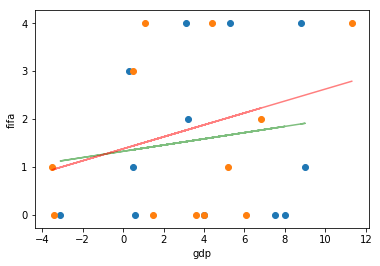

In [27]:
box = gdpb
boy = b0 + b1 * box
box1 = gdpb1
boy1 = b02 + b12 * box1

plt.scatter(gdpb, b)
plt.plot(box, boy, color='green', alpha=0.5)
plt.scatter(gdpb1, b)
plt.plot(box1, boy1, color='red', alpha=0.5)

plt.xlabel('gdp')
plt.ylabel('fifa')

Найдём коэффициенты линейной регрессии: сначала год к году, потом год после чемпионата. теперь франция

In [28]:
f1 = ((gdpf * f).mean() - gdpf.mean() * f.mean()) / ((gdpf ** 2).mean() - gdpf.mean() ** 2)
f1

0.0516590502682295

In [29]:
f0 = f.mean() - f1 * gdpf.mean()
f0

0.689548976753428

In [30]:
f12 = ((gdpf1 * f).mean() - gdpf1.mean() * f.mean()) / ((gdpf1 ** 2).mean() - gdpf1.mean() ** 2)
f12

0.23484051875219056

In [31]:
f02 = f.mean() - f1 * gdpf1.mean()
f02

0.7274322802834629

Text(0, 0.5, 'fifa')

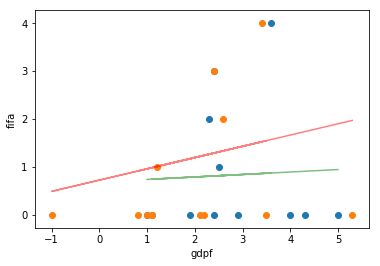

In [32]:
fox = gdpf
foy = f0 + f1 * fox
fox1 = gdpf1
foy1 = f02 + f12 * fox1
plt.scatter(gdpf, f)
plt.plot(fox, foy, color='green', alpha=0.5)
plt.scatter(gdpf1, f)
plt.plot(fox1, foy1, color='red', alpha=0.5)

plt.xlabel('gdpf')
plt.ylabel('fifa')

Найдём коэффициенты линейной регрессии: сначала год к году, потом год после чемпионата. теперь италия

In [33]:
i1 = ((gdpi * i).mean() - gdpi.mean() * i.mean()) / ((gdpi ** 2).mean() - gdpi.mean() ** 2)
i1

0.026490388120640553

In [34]:
i0 = i.mean() - i1 * gdpi.mean()
i0

1.3568425401608868

In [35]:
i12 = ((gdpi1 * i).mean() - gdpi1.mean() * i.mean()) / ((gdpi1 ** 2).mean() - gdpi1.mean() ** 2)
i12

0.16007973475988058

In [36]:
i02 = i.mean() - i1 * gdpi1.mean()
i02

1.3740612924393032

Text(0, 0.5, 'fifa')

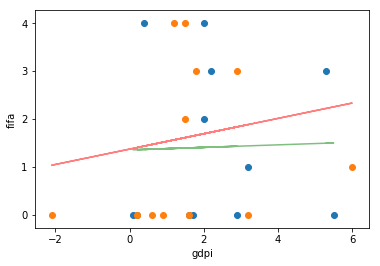

In [37]:
iox = gdpi
ioy = i0 + i1 * iox
iox1 = gdpi1
ioy1 = i02 + i12 * iox1
plt.scatter(gdpi, i)
plt.plot(iox, ioy, color='green', alpha=0.5)
plt.scatter(gdpi1, i)
plt.plot(iox1, ioy1, color='red', alpha=0.5)

plt.xlabel('gdpi')
plt.ylabel('fifa')

Найдём коэффициенты линейной регрессии: сначала год к году, потом год после чемпионата. теперь голландия

In [38]:
g1 = ((gdpg * g).mean() - gdpg.mean() * g.mean()) / ((gdpg ** 2).mean() - gdpg.mean() ** 2)
g1

-0.05708117601858781

In [39]:
g0 = g.mean() - g1 * gdpg.mean()
g0

1.1536434987833655

In [40]:
g12 = ((gdpg1 * g).mean() - gdpg1.mean() * g.mean()) / ((gdpg1 ** 2).mean() - gdpg1.mean() ** 2)
g12

-0.9868822825316919

In [41]:
g02 = g.mean() - g1 * gdpg1.mean()
g02

1.1365667136244713

Text(0, 0.5, 'fifa')

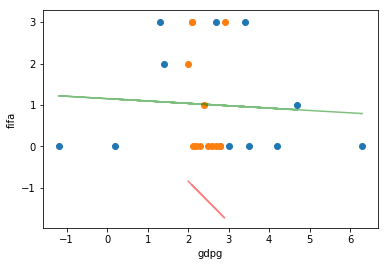

In [42]:
gox = gdpg
goy = g0 + g1 * gox
gox1 = gdpg1
goy1 = g02 + g12 * gox1
plt.scatter(gdpg, g)
plt.plot(gox, goy, color='green', alpha=0.5)
plt.scatter(gdpg1, g)
plt.plot(gox1, goy1, color='red', alpha=0.5)

plt.xlabel('gdpg')
plt.ylabel('fifa')

Text(0, 0.5, 'fifa')

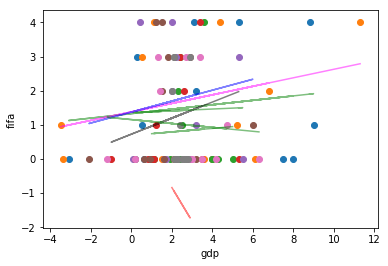

In [43]:
bx = gdpb
by = b0 + b1 * bx

plt.scatter(gdpb, b)
plt.plot(bx, by, color='green', alpha=0.5)

bx = gdpb1
by = b02 + b12 * bx

plt.scatter(gdpb1, b)

plt.plot(bx, by, color='magenta', alpha=0.5)



fx = gdpf
fy = f0 + f1 * fx

plt.scatter(gdpf, f)
plt.plot(fx, fy, color='green', alpha=0.5)

fx = gdpf1
fy = f02 + f12 * fx

plt.scatter(gdpf1, f)

plt.plot(fx, fy, color='black', alpha=0.5)

ix = gdpi
iy = i0 + i1 * ix

plt.scatter(gdpi, i)
plt.plot(ix, iy, color='green', alpha=0.5)

ix = gdpi1
iy = i02 + i12 * ix

plt.scatter(gdpi1, i)

plt.plot(ix, iy, color='blue', alpha=0.5)

gx = gdpg
gy = g0 + g1 * gx

plt.scatter(gdpg, g)
plt.plot(gx, gy, color='green', alpha=0.5)

gx = gdpg1
gy = g02 + g12 * gx

plt.scatter(gdpg1, g)

plt.plot(gx, gy, color='red', alpha=0.5)

plt.xlabel('gdp')
plt.ylabel('fifa')

Text(0.5, 1.0, 'netherlands')

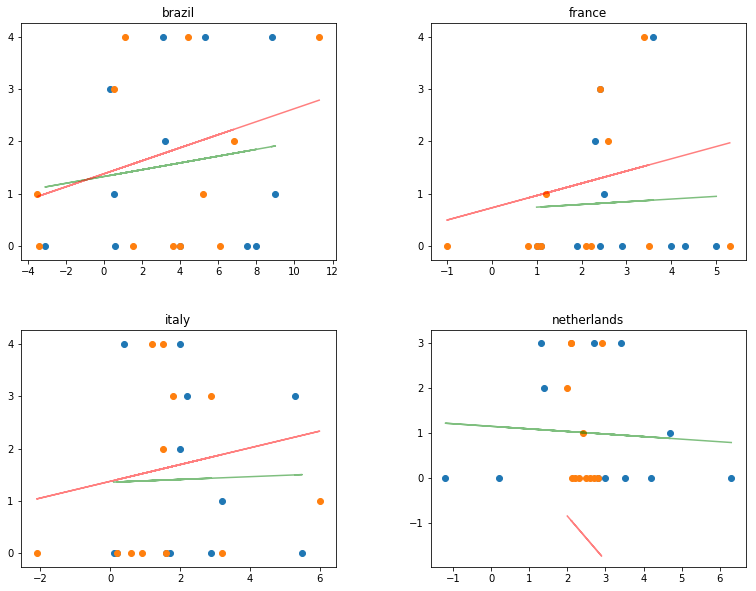

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
fig.set_size_inches(13, 10)


fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.scatter(gdpb, b)
ax1.plot(box, boy, color='green', alpha=0.5)
ax1.scatter(gdpb1, b)
ax1.plot(box1, boy1, color='red', alpha=0.5)
ax1.set_title("brazil")

ax2.scatter(gdpf, f)
ax2.plot(fox, foy, color='green', alpha=0.5)
ax2.scatter(gdpf1, f)
ax2.plot(fox1, foy1, color='red', alpha=0.5)
ax2.set_title("france")

ax3.scatter(gdpi, i)
ax3.plot(iox, ioy, color='green', alpha=0.5)
ax3.scatter(gdpi1, i)
ax3.plot(iox1, ioy1, color='red', alpha=0.5)
ax3.set_title("italy")

ax4.scatter(gdpg, g)
ax4.plot(gox, goy, color='green', alpha=0.5)
ax4.scatter(gdpg1, g)
ax4.plot(gox1, goy1, color='red', alpha=0.5)
ax4.set_title("netherlands")

видна некая зависимость роста ввп от результата игры национальной команды. если команда играла в финальной части ЧМ, то в след году ВВП страны рос. При этом зависимости ВВП от результатов команды в год проведения не видно. Однако из общего ряда выбиваются голландцы.

теперь я хочу посчитать вероятность роста Ввп страны, в случае если ее команда играет в финальной части ЧМ. Возьму те же 12 последних чемпионатов (без 2018). Если команда играла в финальной части и при этом ее ВВП на след год по темпу роста был выше предыдущего года, то это 1, если нет то 0.При этом в количество экспериментов войдет только число раз, когда команда участвовала. думаю, что эти событие можно признать совместными.

brazil 3/7
italy 3/6
netherlands 3/5
france 2/4

количество положительных исходов к количеству испытаний будет 11/22. или 0.5.

то есть, если команда успешно сыграет, ввп ее страны не только вырастет, но и с вероятностью 50 процентов будет выше предыдущего года.

In [45]:
(3/7 + 3/6 + 3/5 + 2/4) / 4

0.5071428571428571

интересно посмотреть и с другой стороны. С какой вероятностью ввп снизится, если команда не играет в финале чм. Соответственно 1, если команда не играет и ввп на след год снижается, 0 если ввп растет

brazil 3/5
italy 4/6
netherlands 5/7
france 5/8

количество положительных исходов к количеству испытаний будет 17/26. или 0.65

то есть, если команда, постоянный участник финальной стадии ЧМ, не попадет в четверку лучших, то с вероятность 65 процентов ввп этой страны на след год снизится.

In [46]:
(3/5 + 4/6 + 5/7 + 5/8) / 4

0.6514880952380953